# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### By -
#### DHRUV SINGH

In [25]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [26]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot this data points on 2-D graph to visualize our dataset and check whether we can find any relationship between the data. We create visualiztion with the following script : 

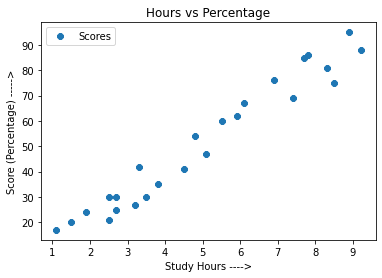

In [27]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='8')  
plt.title('Hours vs Percentage')  
plt.xlabel('Study Hours ---->')  
plt.ylabel('Score (Percentage) ----->')  
plt.show()

###### **From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

#### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [28]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [29]:
from sklearn.model_selection import train_test_split  
XTrain, XTest, yTrain, yTest = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

#### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [30]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(XTrain, yTrain) 

print("Training complete.")

Training complete.


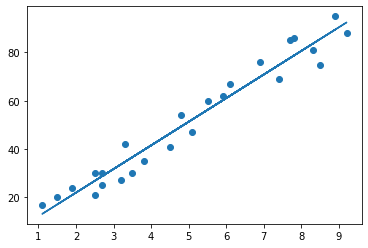

In [31]:
# Plotting the regression line
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Making Predictions
After we have trained our algorithm, we will now make predictions.

In [32]:
print(XTest) 
y_pred = regression.predict(XTest) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [33]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual VAlue': yTest, 'Predicted Value': y_pred})  
df 

,Actual VAlue,Predicted Value
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [34]:
# You can also test with your own data
hours = np.array([9.25])
hours = hours[np.newaxis,:]
taskhours = regression.predict(hours)
print("Hours of Study = {}".format(hours))
print("Predicted Score in Percentage = {}%".format(taskhours[0]))

Hours of Study = [[9.25]]
Predicted Score in Percentage = 92.91505723477056%


#### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error.

In [35]:
from sklearn import metrics
print('Mean Absolute Error:',
       metrics.mean_absolute_error(yTest, y_pred))

Mean Absolute Error: 4.419727808027652
